In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [2]:
df = pd.read_csv(r"flavors_of_cacao.csv")
df.head(20)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


Explore dataset:

In [3]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

Transform column with Cocoa percents

In [4]:
#Transform cocoa persent from string to integer
df['Cocoa persentage'] = list(map(lambda x:float(x[:-1]),df['Cocoa\nPercent']))
df.drop("Cocoa\nPercent",axis=1,inplace = True)

In [5]:
df.describe(include = 'all')

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Company Location,Rating,Bean Type,Broad Bean Origin,Cocoa persentage
count,1795,1795,1795.000000,1795.000000,1795,1795.000000,1794,1794,1795.000000
unique,416,1039,NaN,NaN,60,NaN,41,100,NaN
top,Soma,Madagascar,NaN,NaN,U.S.A.,NaN,,Venezuela,NaN
freq,47,57,NaN,NaN,764,NaN,887,214,NaN
mean,NaN,NaN,1035.904735,2012.325348,NaN,3.185933,NaN,NaN,71.698329
std,NaN,NaN,552.886365,2.927210,NaN,0.478062,NaN,NaN,6.323118
min,NaN,NaN,5.000000,2006.000000,NaN,1.000000,NaN,NaN,42.000000
25%,NaN,NaN,576.000000,2010.000000,NaN,2.875000,NaN,NaN,70.000000
50%,NaN,NaN,1069.000000,2013.000000,NaN,3.250000,NaN,NaN,70.000000
75%,NaN,NaN,1502.000000,2015.000000,NaN,3.500000,NaN,NaN,75.000000


Check missed data:

In [6]:
df.replace(to_replace='\xa0',value=np.nan,inplace = True,regex = True)#because empty cell are filled with '\xa0'

In [7]:
df.isnull().sum(axis=0)

Company \n(Maker-if known)             0
Specific Bean Origin\nor Bar Name      0
REF                                    0
Review\nDate                           0
Company\nLocation                      0
Rating                                 0
Bean\nType                           888
Broad Bean\nOrigin                    74
Cocoa persentage                       0
dtype: int64

In [8]:
#and drop 2 columns for now
df_dropped = df.drop(['Bean\nType','Broad Bean\nOrigin'],axis = 1)
df_dropped.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Company Location,Rating,Cocoa persentage
0,A. Morin,Agua Grande,1876,2016,France,3.75,63.0
1,A. Morin,Kpime,1676,2015,France,2.75,70.0
2,A. Morin,Atsane,1676,2015,France,3.00,70.0
3,A. Morin,Akata,1680,2015,France,3.50,70.0
4,A. Morin,Quilla,1704,2015,France,3.50,70.0
5,A. Morin,Carenero,1315,2014,France,2.75,70.0
6,A. Morin,Cuba,1315,2014,France,3.50,70.0
7,A. Morin,Sur del Lago,1315,2014,France,3.50,70.0
8,A. Morin,Puerto Cabello,1319,2014,France,3.75,70.0
9,A. Morin,Pablino,1319,2014,France,4.00,70.0


Top 10 Company Locations:

In [9]:
df_dropped['Company\nLocation'].value_counts()[0:10]

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: Company\nLocation, dtype: int64

Use label encoding for visualisation:

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_dropped['Company\nLocation'] = label_encoder.fit_transform(df_dropped['Company\nLocation'])
df_dropped['Company\xa0\n(Maker-if known)'] = label_encoder.fit_transform(df_dropped['Company\xa0\n(Maker-if known)'])

In [11]:
df_dropped

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Company Location,Rating,Cocoa persentage
0,0,Agua Grande,1876,2016,18,3.75,63.0
1,0,Kpime,1676,2015,18,2.75,70.0
2,0,Atsane,1676,2015,18,3.00,70.0
3,0,Akata,1680,2015,18,3.50,70.0
4,0,Quilla,1704,2015,18,3.50,70.0
5,0,Carenero,1315,2014,18,2.75,70.0
6,0,Cuba,1315,2014,18,3.50,70.0
7,0,Sur del Lago,1315,2014,18,3.50,70.0
8,0,Puerto Cabello,1319,2014,18,3.75,70.0
9,0,Pablino,1319,2014,18,4.00,70.0


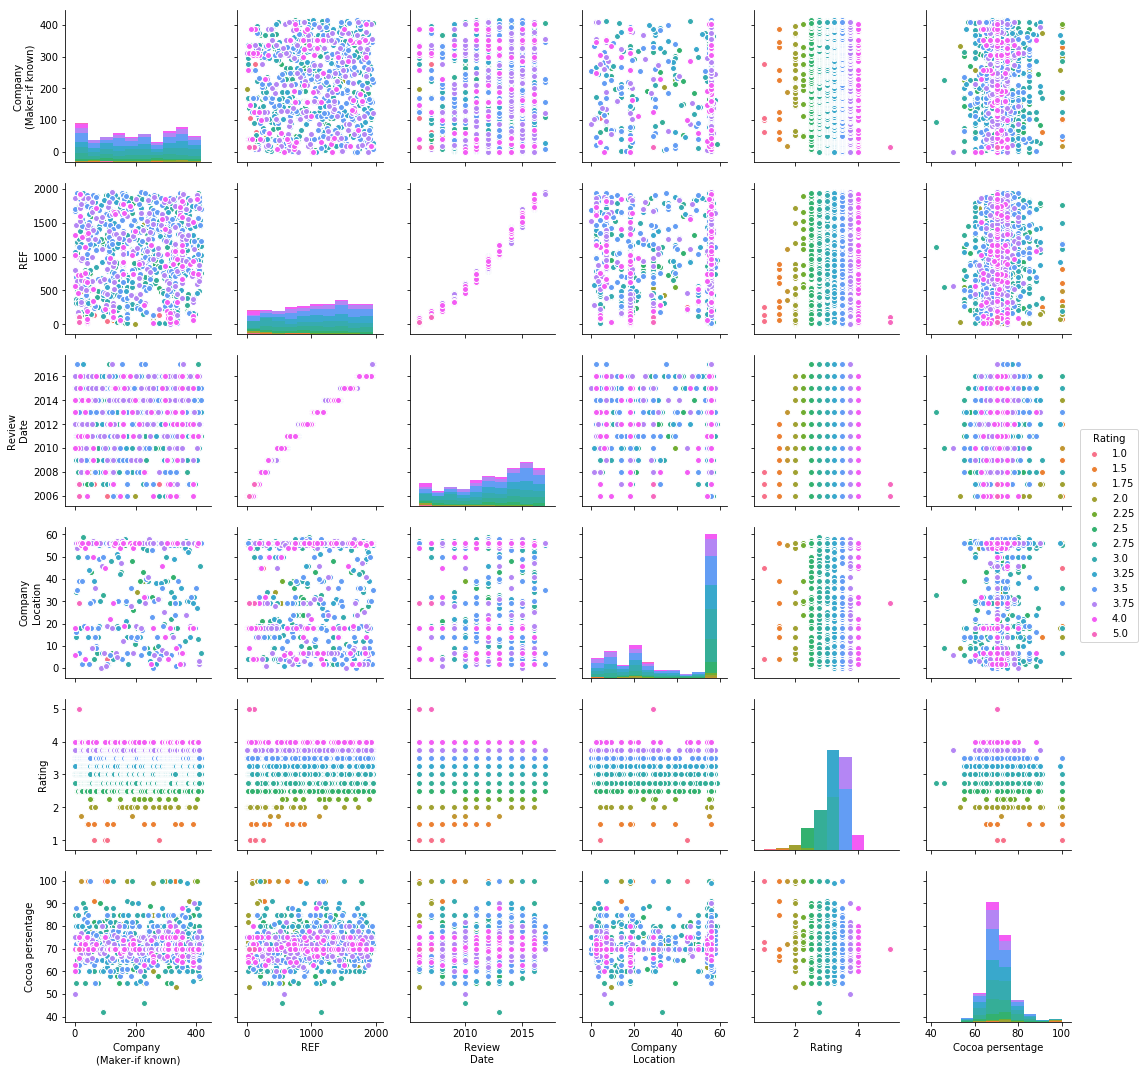

In [12]:
sns.pairplot(df_dropped,hue = 'Rating')

In [13]:
#Drop Specific Bean origin column
df_dropped.drop("Specific Bean Origin\nor Bar Name",inplace = True,axis = 1)

In [14]:
df_dropped.head(10)

,Company (Maker-if known),REF,Review Date,Company Location,Rating,Cocoa persentage
0,0,1876,2016,18,3.75,63.0
1,0,1676,2015,18,2.75,70.0
2,0,1676,2015,18,3.00,70.0
3,0,1680,2015,18,3.50,70.0
4,0,1704,2015,18,3.50,70.0
5,0,1315,2014,18,2.75,70.0
6,0,1315,2014,18,3.50,70.0
7,0,1315,2014,18,3.50,70.0
8,0,1319,2014,18,3.75,70.0
9,0,1319,2014,18,4.00,70.0


Now dataset contains only numeric values. For further visualization data has to be rescaled. Data will be visualized wtih MDS and TSNE

In [15]:
df_scaled=scale(df_dropped.drop("Rating",axis=1),axis=1)

In [16]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import matplotlib.cm as cm

tsne = TSNE(random_state = 321)
tsne_representation = tsne.fit_transform(df_scaled)

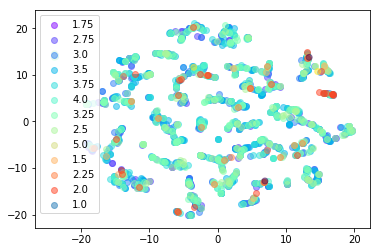

In [17]:
colors = cm.rainbow(np.linspace(0,1,np.unique(df_dropped["Rating"]).shape[0]))
for y,c in zip(set(df_dropped["Rating"]),colors):
    plt.scatter(tsne_representation[df_dropped["Rating"]==y,0],
               tsne_representation[df_dropped["Rating"]==y,1],c=c,alpha = 0.5,label = str(y),)
plt.legend()

In [18]:
from sklearn.metrics.pairwise import pairwise_distances
pair = pairwise_distances(df_scaled)
mds = MDS(random_state=321,dissimilarity='precomputed')
mds_representation = mds.fit_transform(pair)

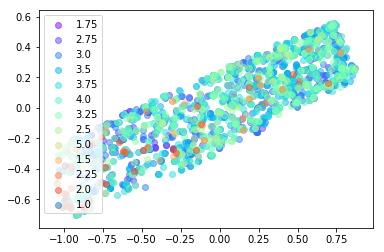

In [19]:
colors = cm.rainbow(np.linspace(0,1,np.unique(df_dropped["Rating"]).shape[0]))
for y,c in zip(set(df_dropped["Rating"]),colors):
    plt.scatter(mds_representation[df_dropped["Rating"]==y,0],
               mds_representation[df_dropped["Rating"]==y,1],c=c,alpha = 0.5,label = str(y),)
plt.legend()